# Wine Quality

## Notebook by [WenyiXu](https://github.com/xuwenyihust)

### Import libraries

In [1]:
%matplotlib inline

import numpy as np
import scipy as sp
import pandas as pd
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn.cross_validation

### Load the data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/xuwenyihust/Wine-Quality/master/data/winequality-red.csv", sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
print(df.shape)

(1599, 12)


Separate the dataset into **feature matrix X** & **respoinse vector y**.

In [5]:
X_df = df.iloc[:,:-1]
X_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [6]:
X = X_df.as_matrix()
print(X[:3])

[[  7.40000000e+00   7.00000000e-01   0.00000000e+00   1.90000000e+00
    7.60000000e-02   1.10000000e+01   3.40000000e+01   9.97800000e-01
    3.51000000e+00   5.60000000e-01   9.40000000e+00]
 [  7.80000000e+00   8.80000000e-01   0.00000000e+00   2.60000000e+00
    9.80000000e-02   2.50000000e+01   6.70000000e+01   9.96800000e-01
    3.20000000e+00   6.80000000e-01   9.80000000e+00]
 [  7.80000000e+00   7.60000000e-01   4.00000000e-02   2.30000000e+00
    9.20000000e-02   1.50000000e+01   5.40000000e+01   9.97000000e-01
    3.26000000e+00   6.50000000e-01   9.80000000e+00]]


In [7]:
y_df = df["quality"].values
print(y_df[:10])

[5 5 5 6 5 5 5 7 7 5]


### Data Preview

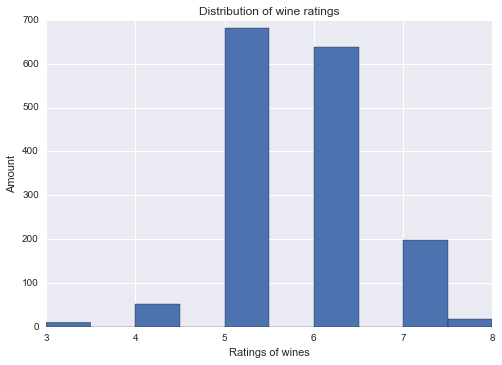

In [8]:
plt.hist(y_df)

plt.xlabel('Ratings of wines')
plt.ylabel('Amount')
plt.title('Distribution of wine ratings')
plt.show()

### 1~10 Ratings to Binary Classification

Simplify the classification problem into a binary one: **good/bad**

Score < 7: bad(0); score >= 7: good(1).

In [9]:
# sklearn can only deal with numpy arrys
y = np.array([1 if i>=7 else 0 for i in y_df])
print(y[:10])

[0 0 0 0 0 0 0 1 1 0]


### Random Forests Classifier Construction

Choose random forests method to do the classification.

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

### Parameter Tuning

Parameter '**number of decision trees to construct**' is very important.

Iterate the 'number of decision trees'(**n_estimators**) parameter from 1 to 40.

For each iteration, use **cross_val_score** to compute its score 10 times with different splitting.

In [11]:
scores = []

for num_trees in range(1,41):
    clf = RandomForestClassifier(n_estimators = num_trees)
    scores.append(cross_val_score(clf, X, y, cv=10))

In [12]:
print(scores[0])
print(scores[1])

[ 0.85714286  0.8447205   0.825       0.8125      0.90625     0.84375     0.8
  0.7672956   0.80503145  0.82389937]
[ 0.8757764   0.88819876  0.81875     0.86875     0.86875     0.88125     0.85
  0.88679245  0.86792453  0.86792453]


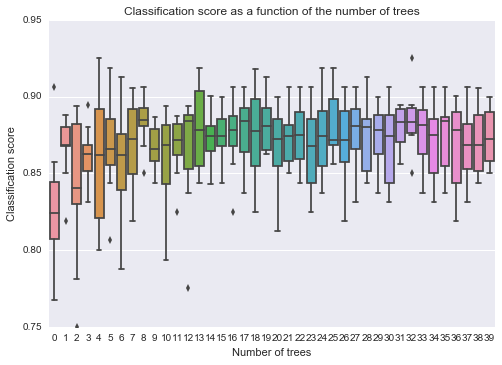

In [13]:
sns.boxplot(data=scores)
plt.xlabel('Number of trees')
plt.ylabel('Classification score')
plt.title('Classification score as a function of the number of trees')
plt.show()

### Unbalanced Classification Evaluation

In [14]:
good_ratio = sum(y) / len(y)
bad_ratio = 1 - good_ratio
print('Ratio of good wine: ', good_ratio)
print('Ratio of bad wine: ', bad_ratio)

Ratio of good wine:  0.135709818637
Ratio of bad wine:  0.864290181363


We can see that **the classes are unbalanced**.

Much more 'bad' wines

The **accuracy** metric may be misleading in this case, choose **F1** metric instead, which is less sensitive to imbalance. 

**F1: Harmonic mean of sensitivity & precision.**

In [15]:
scores = []

for num_trees in range(1,41):
    clf = RandomForestClassifier(n_estimators = num_trees)
    scores.append(cross_val_score(clf, X, y, cv=10, scoring='f1'))

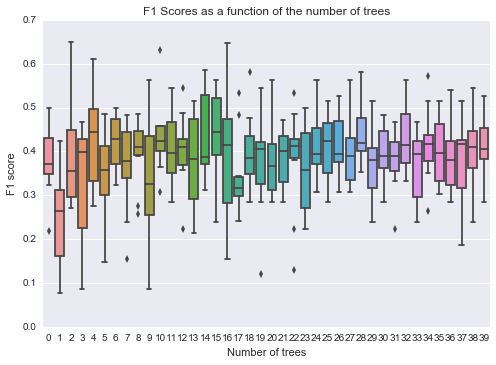

In [16]:
sns.boxplot(data=scores)
plt.xlabel('Number of trees')
plt.ylabel('F1 score')
plt.title('F1 Scores as a function of the number of trees')
plt.show()

The scores are clustered around the **40% mark**.

Set the number of decision trees to be 15. 

### Probability Calibration

Compute the **predicted probabilities**.

In [17]:
clf = RandomForestClassifier(n_estimators = 15)
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

clf.**predict()** gives the **predicted label**

clf.**predict_proba()** gives the **predicted probability**

In [18]:
print(clf.predict(X)[:10])

[0 0 0 0 0 0 0 1 0 0]


In [19]:
print(clf.predict_proba(X)[:10])

[[ 1.          0.        ]
 [ 0.93333333  0.06666667]
 [ 1.          0.        ]
 [ 0.93333333  0.06666667]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.93333333  0.06666667]
 [ 0.2         0.8       ]
 [ 0.53333333  0.46666667]
 [ 0.93333333  0.06666667]]


Want to **predict label from predicted probability**.

Construct a prediction based on these predicted probabilities that labels all wines with a **predicted probability of being in class 1 > 0.5** with a 1 and 0 otherwise

In [25]:
prediction = clf.predict(X)
prediction_from_proba = (clf.predict_proba(X)[:,1]>0.5).astype(int)

**Compare**

the **constructed prediction** based on probabilities

with

the **classifier's prediction **

In [26]:
correct = [1 if prediction_from_proba[i]== prediction[i] else 0 for i in range(len(prediction))]
print(sum(correct)/len(correct))

1.0


In [27]:
prediction_from_proba = (clf.predict_proba(X)[:,1]>0.8).astype(int)
correct = [1 if prediction_from_proba[i]== prediction[i] else 0 for i in range(len(prediction))]
print(sum(correct)/len(correct))

0.9449656035021888


In [28]:
prediction_from_proba = (clf.predict_proba(X)[:,1]>0.1).astype(int)
correct = [1 if prediction_from_proba[i]== prediction[i] else 0 for i in range(len(prediction))]
print(sum(correct)/len(correct))

0.8930581613508443


### Probability Calibration Function

Function to compute prediction from **trained classifier, training dataset** and **cutoff value(threshold)**.

In [29]:
"""
cutoff_predict(clf, X, cutoff)

Inputs:
clf: a **trained** classifier object
X: a 2D numpy array of features
cutoff: a float giving the cutoff value used to convert
        predicted probabilities into a 0/1 prediction.

Output:
a numpy array of 0/1 predictions.
"""

def cutoff_predict(clf, X, cutoff):
    return (clf.predict_proba(X)[:,1] > cutoff).astype(int)

### Cutoff Value Tuning

**Evaluate different cutoff values under different train/test splittings** using **cross-validation**.

In [41]:
def custom_f1(cutoff):
    def f1_cutoff(clf, X, y):
        ypred = cutoff_predict(clf, X, cutoff)
        return sklearn.metrics.f1_score(y, ypred)
        
    return f1_cutoff

In [42]:
scores = []

for cutoff in np.arange(0.1,0.9,0.1):
    clf = RandomForestClassifier(n_estimators = 15)
    score_list = cross_val_score(clf, X, y, cv=10, scoring=custom_f1(cutoff))   
    scores.append(score_list)

C:\Users\Wenyi Xu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Using a **boxplot**, compare the **F1 scores** that correspond to each candidate **cutoff** value.

Choose cutoff value to be **0.2**. This is due to **class imbalance**, many fewer 'good' wine.

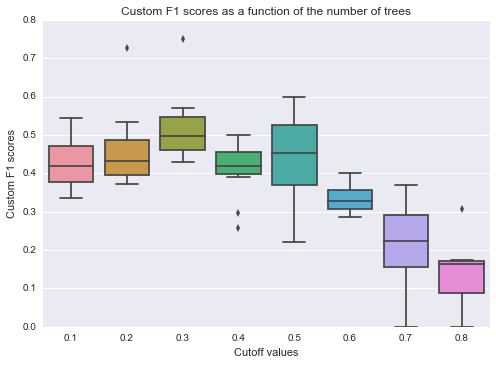

In [54]:
sns.boxplot(x=np.arange(0.1,0.9,0.1), y=scores)
plt.xlabel('Cutoff values')
plt.ylabel('Custom F1 scores')
plt.title('Custom F1 scores as a function of the number of trees')
plt.show()